In [49]:
import pandas as pd
import lightgbm as ltb

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')


%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [8]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_seq_items', 1000)

In [2]:
data_traff = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_traff.sas7bdat')
data = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/train/hash_school_dpi_model_fe.sas7bdat')
print(data.shape)
print(data_traff.shape)
data_traff = data_traff.drop_duplicates()
data = data.drop_duplicates()
print(data.shape)
print(data_traff.shape)


(250043, 906)
(249967, 6)
(250026, 906)
(249955, 6)


In [5]:
# test_data_traff = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_traff_test.sas7bdat')
# test_data = pd.read_sas('C:/Users/Пользователь/Desktop/BDL/Final_projects/model2/data/test/hash_school_dpi_model_fe_test.sas7bdat')
# print(test_data.shape)
# print(test_data_traff.shape)

In [7]:
# data_traff_unique = data_traff.abon_id.value_counts()
# duplicates_data_traff = data_traff_unique[data_traff_unique > 1].index.to_list()
# data_traff.loc[data_traff['abon_id'].isin(duplicates_data_traff)].sort_values(by = 'abon_id')

In [3]:
data = data.merge(data_traff, on = 'abon_id')
del data_traff

In [4]:
describe_data = data.describe()


In [5]:
describe_data.head()

abon_id   Balance_uah          TM_ID             lt  \
count  2.500170e+05  2.493130e+05  249313.000000  248200.000000   
mean   1.455326e+06 -8.410127e+11      71.938627       3.910456   
std    2.559685e+05  7.135079e+13       0.417155       0.805463   
min    1.000004e+06 -1.925480e+16      60.441848       0.008845   
25%    1.232872e+06  6.848718e-04      71.714189       3.604274   

       CALCULATION_METHOD_ID  device_days_usage  device_brand_samsung  \
count          249313.000000      229904.000000         229904.000000   
mean                1.097841          32.193515              0.250522   
std                 0.297100          12.367776              0.433315   
min                 1.000000           3.210402              0.000000   
25%                 1.000000          23.617777              0.000000   

       device_brand_nokia  device_brand_lenovo  device_brand_apple  ...  \
count       229904.000000        229904.000000       229904.000000  ...   
mean             0.018595             0.037420            0.145239  ...   
std              0.135089             0.189789            0.352342  ...   
min              0.000000             0.000000            0.000000  ...   
25%              0.000000             0.000000            0.000000  ...   

       device_has_hardware_umts  device_has_LTE_BAND_3  myvf_day_usage  \
count             240290.000000          240290.000000   114892.000000   
mean                   0.829947               0.648213        5.649929   
std                    0.375680               0.477529        1.071414   
min                    0.000000               0.000000        0.000000   
25%                    1.000000               0.000000        5.129899   

       GBA_remain_days         target       traff_m5       traff_m4  \
count     24129.000000  250017.000000  250017.000000  250017.000000   
mean          4.711414       5.750401       4.606745      23.063259   
std           1.003425      11.874209       9.951010    8912.637246   
min           0.000000       0.000000       0.000000       0.000000   
25%           4.143135       0.032657       0.040245       0.118364   

            traff_m3       traff_m2       traff_m1  
count  250017.000000  250017.000000  250017.000000  
mean        5.676236       5.795613       5.937069  
std        11.303499      11.190418      11.972596  
min         0.000000       0.004883       0.000000  
25%         0.188417       0.324519       0.215108  

[5 rows x 911 columns]

In [9]:
#print(data.isnull().sum().sort_values(ascending = False))
print(data.isnull().sum().sort_values(ascending = False)/data['abon_id'].size)

entertainment                       0.999964
cnt_sms_category_collect            0.999916
cnt_unq_category_collect            0.999916
MV_FRAUD_BLOCK                      0.999912
Food                                0.999904
tsoa_mail_cnt                       0.999892
cnt_bank_sms_category_radabank      0.999644
cnt_bank_sms_category_unexbank      0.999604
cnt_bank_sms_category_bisbank       0.999528
Fax                                 0.999452
cnt_bank_sms_category_cominbank     0.999280
cnt_bank_sms_category_globusbank    0.999244
cnt_bank_sms_category_accordbank    0.999180
cnt_unq_category_fest               0.999012
cnt_sms_category_fest               0.999012
cnt_bank_sms_category_pivdennyib    0.998908
Cars                                0.997868
Shops                               0.996824
cnt_bank_sms_category_sberbank      0.996768
cnt_bank_sms_category_ukreximban    0.996388
cnt_sms_category_ticket             0.996036
cnt_unq_category_ticket             0.996036
cnt_bank_s

In [10]:
columns_nulls_less_60p = data.columns[(data.isnull().sum()/data['abon_id'].size) < 0.6]
columns_nulls_less_60p.shape

(780,)

In [11]:
data_nulls_less_60p = data[columns_nulls_less_60p]
data_nulls_less_60p.shape
del data

In [12]:
data_nulls_less_60p[data_nulls_less_60p['target']== 0].shape[0]/data_nulls_less_60p.shape[0]


0.13627073359011588

In [17]:
#traff data turn to negatives in comarison with where target is not zero

describe_data = describe_data[columns_nulls_less_60p]
describe_data_nulls_less_60p_target0 = data_nulls_less_60p[data_nulls_less_60p['target']== 0].describe()
describe_data_nulls_less_60p_target0.sub(describe_data)


abon_id   Balance_uah          TM_ID             lt  \
count -215947.000000 -2.157660e+05 -215766.000000 -214751.000000   
mean   134880.489869 -1.295493e+12       0.044267      -0.570233   
std     -2653.062319  7.979361e+13       0.013985       0.310178   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%    169274.250000 -5.570191e-04       0.007112      -0.981948   
50%    200074.000000 -1.749774e-01       0.170632      -0.530172   
75%    132635.000000 -1.124656e+01       0.003466      -0.238923   
max      -481.000000  0.000000e+00       0.000000      -0.288065   

       CALCULATION_METHOD_ID  device_days_usage  device_brand_samsung  \
count         -215766.000000     -206088.000000        -206088.000000   
mean               -0.037955          -2.982122              0.002417   
std                -0.059821           1.537997              0.001391   
min                 0.000000           0.000000              0.000000   
25%                 0.000000          -5.690119              0.000000   
50%                 0.000000          -3.793652              0.000000   
75%                 0.000000          -1.430794              0.000000   
max                 0.000000           0.000000              0.000000   

       device_brand_nokia  device_brand_lenovo  device_brand_apple  \
count      -206088.000000       -206088.000000      -206088.000000   
mean             0.016172             0.018173           -0.070163   
std              0.048103             0.039350           -0.088824   
min              0.000000             0.000000            0.000000   
25%              0.000000             0.000000            0.000000   
50%              0.000000             0.000000            0.000000   
75%              0.000000             0.000000            0.000000   
max              0.000000             0.000000            0.000000   

       device_brand_huawei  device_brand_lg  device_brand_xiaomi  \
count       -206088.000000   -206088.000000       -206088.000000   
mean              0.005936         0.005178            -0.044345   
std               0.007444         0.022745            -0.028895   
min               0.000000         0.000000             0.000000   
25%               0.000000         0.000000             0.000000   
50%               0.000000         0.000000             0.000000   
75%               0.000000         0.000000             0.000000   
max               0.000000         0.000000             0.000000   

       device_brand_meizu  device_brand_prestigio  device_brand_sony  \
count      -206088.000000          -206088.000000     -206088.000000   
mean             0.000322                0.004544           0.000407   
std              0.000720                0.025060           0.001931   
min              0.000000                0.000000           0.000000   
25%              0.000000                0.000000           0.000000   
50%              0.000000                0.000000           0.000000   
75%              0.000000                0.000000           0.000000   
max              0.000000                0.000000           0.000000   

       device_brand_nan  device_brand_other  device_has_gprs  device_has_wifi  \
count    -206088.000000      -206088.000000   -206088.000000   -206088.000000   
mean           0.003175           -0.003175        -0.035688        -0.042972   
std            0.020398            0.020398         0.035136         0.038507   
min            0.000000            0.000000         0.000000         0.000000   
25%            0.000000            0.000000         0.000000         0.000000   
50%            0.000000            0.000000         0.000000         0.000000   
75%            0.000000            0.000000         0.000000         0.000000   
max            0.000000            0.000000         0.000000         0.000000   

       device_has_lte  device_type_modem  device_type_module  \
count  -206088.000000     -206088.000000      -206088.0

In [45]:
print(describe_data.non_accum_internet_vol_max_mnt1)
print()
print(describe_data_nulls_less_60p_target0.non_accum_internet_vol_max_mnt1)

count    2.492580e+05
mean     3.081017e+17
std      7.768995e+18
min      0.000000e+00
25%      1.895736e+12
50%      3.100787e+14
75%      1.249641e+16
max      3.661424e+21
Name: non_accum_internet_vol_max_mnt1, dtype: float64

count    3.349700e+04
mean     2.230066e+17
std      2.966430e+18
min      0.000000e+00
25%      2.188933e+05
50%      2.084923e+12
75%      1.523091e+15
max      3.995909e+20
Name: non_accum_internet_vol_max_mnt1, dtype: float64


In [21]:
stats_comp = describe_data_nulls_less_60p_target0.iloc[[1,5], :].sub(describe_data.iloc[[1,5], :]).transpose()

In [37]:
stats_comp.sort_values(by = '50%').style.format({'mean' : '{:,.2f}', '50%' : '{:,.2f}'})

In [ ]:
print(data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].max())
data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].min()
#sns.distplot(data_nulls_less_60p.non_accum_internet_vol_max_mnt1, bins = 10000)
#data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].sort_values(ascending = False)
data_nulls_less_60p[data_nulls_less_60p['non_accum_internet_vol_max_mnt1'] >  300000000000000].hist()

3.661424427064866e+21


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017FA39CD490>,
      dtype=object)

In [92]:
#sns.distplot(data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].dropna(), hist = True, kde = False, bins = 10)
sns.distplot(data_nulls_less_60p['non_accum_internet_vol_max_mnt1'].dropna(), hist = True, kde = False, bins = 10)
sns.boxplot(data_nulls_less_60p['non_accum_internet_vol_max_mnt1'])

In [89]:
sns.boxplot?

In [14]:
data.dtypes[data.dtypes != 'float'].shape
#data.dtypes[data.dtypes != 'bool'].shape

(0,)

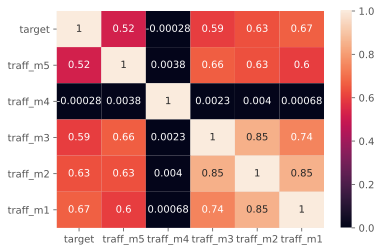

In [15]:
cols = ['target', 'traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
hm = sns.heatmap(data[cols].corr(), cbar=True, annot=True)

In [38]:
# boxplot = data_nulls_less_60p.boxplot(column = ['lt'])
data_nulls_less_60p.columns[]

Index(['DNZ_MEAN_days_open_loan_year1', 'DNZ_DAYS_from_last_year1',
       'MV_Migr_To', 'MV_DOU_Neg_Bal', 'MV_DOU_PPM_VF', 'MV_SERV_RLH',
       'MV_SERV_Y_WO_AF', 'MV_dou_net', 'MV_dou_data', 'MV_dou_2G_d',
       'MV_dou_3G_d', 'MV_dou_4G_d', 'MV_dou_innet_out_v', 'MV_dou_omo_out_v',
       'MV_dou_mn_out_v', 'MV_dou_out_s', 'MV_dou_Roam', 'MV_dou_Roam_d',
       'MV_dou_Roam_v', 'MV_dou', 'MV_FRAUD_BLOCK', 'MV_VLR_Guest',
       'MV_ARPU_2G_d_Traf', 'MV_Traf_2G_d_Mb', 'MV_ARPU_3G_d_Traf',
       'MV_Traf_3G_d_Mb', 'MV_ARPU_4G_d_Traf', 'MV_Traf_4G_d_Mb',
       'MV_Traf_ACCA_out_v_Min', 'MV_ARPU', 'MV_Traf_Cont_inc_s_Cnt',
       'MV_Traf_Cont_inc_v_Min', 'MV_ARPU_Cont_out_s_Traf',
       'MV_Traf_Cont_out_s_Cnt', 'MV_ARPU_Cont_out_v_Traf',
       'MV_Traf_Cont_out_v_Min', 'MV_ARPU_Other_inc_v_Traf',
       'MV_Traf_Other_inc_v_Min', 'MV_ARPU_Other_out_v_Traf',
       'MV_Traf_Other_out_v_Min', 'MV_ARPU_R_inc_v_Traf',
       'MV_Traf_R_inc_v_Min', 'MV_ARPU_R_out_s_Traf', 'MV_Traf_R_

In [41]:
data_nulls_less_60p.head()

DNZ_MEAN_days_open_loan_year1  DNZ_DAYS_from_last_year1  MV_Migr_To  \
0                            NaN                       NaN         0.0   
1                            NaN                       NaN         0.0   
2                            NaN                       NaN         0.0   
3                            NaN                       NaN         1.0   
4                            NaN                       NaN         0.0   

   MV_DOU_Neg_Bal  MV_DOU_PPM_VF  MV_SERV_RLH  MV_SERV_Y_WO_AF  MV_dou_net  \
0             NaN      11.792268          NaN              NaN   11.792268   
1             NaN      11.792268          NaN              NaN   11.792268   
2             NaN      11.792268          NaN              NaN   11.792268   
3             NaN       6.174761          NaN              NaN   10.862541   
4             NaN      11.792268          NaN              NaN   11.792268   

   MV_dou_data  MV_dou_2G_d  MV_dou_3G_d  MV_dou_4G_d  MV_dou_innet_out_v  \
0     0.693147     0.693147     0.693147     0.000000            3.295837   
1     3.465736     3.135494     2.564949     3.401197            3.465736   
2     3.465736     2.302585     3.295837     0.000000            3.178054   
3     2.833213     2.708050     2.484907     0.000000            0.000000   
4     3.465736     2.708050     3.465736     1.945910            3.465736   

   MV_dou_omo_out_v  MV_dou_mn_out_v  MV_dou_out_s  MV_dou_Roam  \
0          2.079442              0.0      1.098612          0.0   
1          1.098612              0.0      1.386294          0.0   
2          1.386294              0.0      0.693147          0.0   
3          0.000000              0.0      0.000000          0.0   
4          1.609438              0.0      0.693147          0.0   

   MV_dou_Roam_d  MV_dou_Roam_v     MV_dou  MV_FRAUD_BLOCK  MV_VLR_Guest  \
0            0.0            0.0  11.792268             NaN           NaN   
1            0.0            0.0  11.792268             NaN           NaN   
2            0.0            0.0  11.792268             NaN           NaN   
3            0.0            0.0  10.862541             NaN           NaN   
4            0.0            0.0  11.792268             NaN           NaN   

   MV_ARPU_2G_d_Traf  MV_Traf_2G_d_Mb  MV_ARPU_3G_d_Traf  MV_Traf_3G_d_Mb  \
0                0.0         1.912639           0.000000         0.000000   
1                0.0         7.987806           0.000000         6.553853   
2                0.0         3.698440           3.133649         5.247543   
3                0.0         4.031506           0.000000         3.700565   
4                0.0         3.027172           0.000000         6.473676   

   MV_ARPU_4G_d_Traf  MV_Traf_4G_d_Mb  MV_Traf_ACCA_out_v_Min   MV_ARPU  \
0                0.0         0.000000                     0.0  4.214594   
1                0.0         7.113706                     0.0  4.374884   
2                0.0         0.000000                     0.0  4.660602   
3                0.0         0.000000                     0.0  0.000000   
4                0.0         7.021794                     0.0  4.903822   

   MV_Traf_Cont_inc_s_Cnt  MV_Traf_Cont_inc_v_Min  MV_ARPU_Cont_out_s_Traf  \
0                4.624973                     0.0                      0.0   
1                3.912023                     0.0                      0.0   
2                3.871201                     0.0                      0.0   
3                3.912023                     0.0                      0.0   
4                4.844187                     0.0                      0.0   

   MV_Traf_Cont_out_s_Cnt  MV_ARPU_Cont_out_v_Traf  MV_Traf_Cont_out_v_Min  \
0                     0.0                      0.0                1.540445   
1                     0.0                      0.0                1.507774   
2                     0.0                      0.0                0.000000   
3                     0.0                      0.0                0.000

In [15]:
# X, y = data.loc[:, data.columns != 'target'], data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

In [16]:
cols_traff_only = ['traff_m5', 'traff_m4', 'traff_m3', 'traff_m2', 'traff_m1']
X, y = data[cols_traff_only], data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 17)

In [17]:
slr = LinearRegression()

slr.fit(X_train, y_train)

print('Slope: {:.2f}'.format(slr.coef_[0]))
print('Intercept: {:.2f}'.format(slr.intercept_))

y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Slope: 0.18
Intercept: 1.24


In [18]:
print('RMSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred, squared = False),
        mean_squared_error(y_test, y_test_pred, squared = False)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

RMSE train: 8.506, test: 8.699
R^2 train: 0.485, test: 0.468


In [20]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()
# newaxis увеличивает размерность массива, flatten — наооборот
# https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_std, y_std, test_size=0.3, random_state=0)

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
print(lasso.coef_)

print('RMSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred, squared = False),
        mean_squared_error(y_test_scaled, y_test_pred, squared = False)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[0.08612048 0.         0.07055969 0.08874961 0.38980275]
RMSE train: 0.729, test: 0.733
R^2 train: 0.467, test: 0.466


In [23]:
data['target'].describe()

count    250017.000000
mean          5.750401
std          11.874209
min           0.000000
25%           0.032657
50%           1.209934
75%           5.358058
max         149.926668
Name: target, dtype: float64

In [24]:
# model = ltb.LGBMRegressor()
# model.fit(X_train, y_train)
# print(); print(model)

# expected_y  = y_test
# predicted_y = model.predict(X_test)


In [25]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_error(expected_y, predicted_y))

NameError: name 'expected_y' is not defined

In [ ]:
#closs_val_score(model, X, y ... )
#from skearn.model_selection import GridSearchCV